<h1> Analisis de datos caso: Datos Seguros</h1>

In [4]:
import pandas as pd

# Definir la ruta del archivo CSV  C:/Users/jhjim
csv_file_path = 'C:/Users/sebas/OneDrive/Documents/Python/Sena datos exploratorios/DatosSeguros.csv'  # Reemplaza esto con la ruta de tu archivo CSV

# Leer el archivo CSV y crear un DataFrame
df = pd.read_csv(csv_file_path)

# Mostrar las primeras filas del DataFrame para verificar que se haya leído correctamente
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro
0,19,F,27.90,0,yes,Caribe,16884.9240
1,19,F,27.90,0,yes,Caribe,16884.9240
2,19,F,27.90,0,yes,Caribe,16884.9240
3,18,M,33.77,1,no,Cundinamarca,1725.5523
4,28,M,33.00,3,no,Cundinamarca,4449.4620


<h2>Pregunta Objetivo</h2>


¿Cuál es la edad poblacional en la que se debe concentrar la estrategia comercial teniendo en cuenta la mayor concentración afiliados? 

<h1>Total de registros</h1>

In [6]:
# Obtener el total de registros (filas) en el DataFrame
total_registros = df.shape[0]

# Muestra el total de registros
print(f"Total de registros: {total_registros}")

Total de registros: 1349


<h1>Total de Columnas</h1>

In [7]:
# Obtén el número total de columnas
total_columnas = df.shape[1]

# Muestra el número total de columnas
print(f'El número total de columnas es: {total_columnas}')

El número total de columnas es: 7


<h1> Información general del dataframe</h1>

In [5]:
# Muestra información general del DataFrame
print("Información general del DataFrame:")
print(df.info())
print("\n")


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB
None




<h4>Estadisticas descriptivas de los datos</h4>

In [10]:
# Muestra estadísticas descriptivas del DataFrame
print("Estadísticas descriptivas del DataFrame:")
print(df.describe())
print("\n")

Estadísticas descriptivas del DataFrame:
              edad          imc        hijos  valor_seguro
count  1349.000000  1347.000000  1349.000000   1349.000000
mean     39.109711    30.618682     1.092661  13311.523280
std      14.071136     6.120026     1.205027  12135.346316
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4751.070000
50%      39.000000    30.300000     1.000000   9411.005000
75%      51.000000    34.600000     2.000000  16884.924000
max      64.000000    53.130000     5.000000  63770.428010




<h1>Interpretacion de los datos resultantes de las tabla.</h1>

<p dir="ltr" style="text-align: left;"></p>
<h3>Interpretación Detallada</h3>
<ul>
    <li>
        <p><strong>Edad</strong>:</p>
        <ul>
            <li>El promedio de edad es 39.11 años, con una desviación estándar de 14.07, lo que indica que la edad de las personas en este conjunto de datos varía significativamente.</li>
            <li>La mayoría de las personas tienen entre 26 y 51 años, con edades mínimas y máximas de 18 y 64 años, respectivamente.</li>
        </ul>
    </li>
    <li>
        <p><strong>IMC (Índice de Masa Corporal)</strong>:</p>
        <ul>
            <li>El promedio de IMC es 30.62, con una desviación estándar de 6.12, indicando que los valores de IMC también tienen una variabilidad considerable.</li>
            <li>El IMC varía entre 15.96 y 53.13.</li>
        </ul>
    </li>
    <li>
        <p><strong>Hijos</strong>:</p>
        <ul>
            <li>En promedio, las personas tienen aproximadamente 1.09 hijos, con una desviación estándar de 1.21.</li>
            <li>El número de hijos varía entre 0 y 5, con el 75% de las personas teniendo hasta 2 hijos.</li>
        </ul>
    </li>
    <li>
        <p><strong>Valor del Seguro</strong>:</p>
        <ul>
            <li>El valor promedio del seguro es 13,311.52, con una desviación estándar de 12,135.35, indicando una alta variabilidad en los valores del seguro.</li>
            <li>Los valores del seguro varían entre 1,121.87 y 63,770.43.</li>
        </ul>
    </li>
</ul><br>
<p></p>

<h>categóricas y numéricas </h1>

In [34]:
# Identificar variables numéricas
variables_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Identificar variables categóricas
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numéricas: {variables_numericas}")
print(f"Variables categóricas: {variables_categoricas}")

Variables numéricas: ['edad', 'imc', 'hijos', 'valor_seguro']
Variables categóricas: ['sexo', 'fumador', 'region']


<h1>Valores Nulos</h1>

In [36]:
# Identificar columnas con valores nulos
columnas_nulas = df.isnull().sum()

# Filtrar columnas que tienen al menos un valor nulo
columnas_con_nulos = columnas_nulas[columnas_nulas > 0]

print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
imc        2
fumador    2
dtype: int64


<h1>Quitar los valores nulos, reemplazandolos con el promedio de los valores de la clase (columna)</h1>

In [37]:
# Llenar los valores nulos con el promedio de la columna
# Calcula el promedio de las columnas numéricas
promedios = df.mean()

# Llenar los valores nulos en las columnas numéricas con su promedio
df.fillna(promedios, inplace=True)

# Mostrar el DataFrame después de llenar los valores nulos
print("\nDataFrame después de llenar los valores nulos con el promedio de la columna:")
print(df)


DataFrame después de llenar los valores nulos con el promedio de la columna:
      edad sexo    imc  hijos fumador        region  valor_seguro
0       19    F  27.90      0     yes        Caribe    16884.9240
1       19    F  27.90      0     yes        Caribe    16884.9240
2       19    F  27.90      0     yes        Caribe    16884.9240
3       18    M  33.77      1      no  Cundinamarca     1725.5523
4       28    M  33.00      3      no  Cundinamarca     4449.4620
...    ...  ...    ...    ...     ...           ...           ...
1344    18    F  36.85      0      no  Cundinamarca     1629.8335
1345    19    F  27.90      0     yes        Caribe    16884.9240
1346    21    F  25.80      0      no        Caribe     2007.9450
1347    61    F  29.07      0     yes     Antioquia    29141.3603
1348    19    F  27.90      0     yes        Caribe    16884.9240

[1349 rows x 7 columns]


C:\Users\jhjim\AppData\Local\Temp\ipykernel_21488\1733687379.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  promedios = df.mean()


In [38]:
# Identificar columnas con valores nulos
columnas_nulas = df.isnull().sum()

# Filtrar columnas que tienen al menos un valor nulo
columnas_con_nulos = columnas_nulas[columnas_nulas > 0]

print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
fumador    2
dtype: int64


<h1>
    Nota. La columna fumador no tiene promedio, es categorica,  para reemplazar el nulo, lo vamos ha hacer con la moda
</h1>

In [39]:

# Calcular la categoría más frecuente (modo) en la columna 'fumador'
modo_fumador = df['fumador'].mode()[0]

# Reemplazar los valores nulos en la columna 'fumador' con el modo
df['fumador'].fillna(modo_fumador, inplace=True)

# Mostrar el DataFrame después de reemplazar los valores nulos
print("\nDataFrame después de reemplazar los valores nulos en 'fumador' con el modo:")
print(df)


DataFrame después de reemplazar los valores nulos en 'fumador' con el modo:
      edad sexo    imc  hijos fumador        region  valor_seguro
0       19    F  27.90      0     yes        Caribe    16884.9240
1       19    F  27.90      0     yes        Caribe    16884.9240
2       19    F  27.90      0     yes        Caribe    16884.9240
3       18    M  33.77      1      no  Cundinamarca     1725.5523
4       28    M  33.00      3      no  Cundinamarca     4449.4620
...    ...  ...    ...    ...     ...           ...           ...
1344    18    F  36.85      0      no  Cundinamarca     1629.8335
1345    19    F  27.90      0     yes        Caribe    16884.9240
1346    21    F  25.80      0      no        Caribe     2007.9450
1347    61    F  29.07      0     yes     Antioquia    29141.3603
1348    19    F  27.90      0     yes        Caribe    16884.9240

[1349 rows x 7 columns]


In [40]:
# Identificar columnas con valores nulos
columnas_nulas = df.isnull().sum()

# Filtrar columnas que tienen al menos un valor nulo
columnas_con_nulos = columnas_nulas[columnas_nulas > 0]

print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
Series([], dtype: int64)


<h1> Registros Duplicados</h1>

In [41]:
# Verificar si hay registros duplicados
duplicados = df.duplicated()

# Contar el número total de registros duplicados
total_duplicados = duplicados.sum()

print(f"\nNúmero total de registros duplicados: {total_duplicados}")


Número total de registros duplicados: 12


<h1>Mostrar los registros duplicados</h1>

In [42]:
# Verificar si hay registros duplicados
duplicados = df.duplicated()

# Contar el número total de registros duplicados
total_duplicados = duplicados.sum()

print(f"\nNúmero total de registros duplicados: {total_duplicados}")

# Mostrar las filas duplicadas
if total_duplicados > 0:
    print("\nRegistros duplicados:")
    print(df[duplicados])
else:
    print("\nNo hay registros duplicados.")



Número total de registros duplicados: 12

Registros duplicados:
      edad sexo     imc  hijos fumador     region  valor_seguro
1       19    F  27.900      0     yes     Caribe   16884.92400
2       19    F  27.900      0     yes     Caribe   16884.92400
583     19    M  30.590      0      no  Antioquia    1639.56310
1229    38    M  16.815      2      no     Boyaca    6640.54485
1230    38    M  16.815      2      no     Boyaca    6640.54485
1231    38    M  16.815      2      no     Boyaca    6640.54485
1237    52    M  34.485      3     yes  Antioquia   60021.39897
1238    20    F  21.800      0     yes     Caribe   20167.33603
1340    19    F  27.900      0     yes     Caribe   16884.92400
1341    19    F  27.900      0     yes     Caribe   16884.92400
1345    19    F  27.900      0     yes     Caribe   16884.92400
1348    19    F  27.900      0     yes     Caribe   16884.92400


<h1>Eliminar Duplicados</h1>

In [43]:
# Eliminar filas duplicadas
df_sin_duplicados = df.drop_duplicates()

# Mostrar el DataFrame sin duplicados
print("\nDataFrame sin duplicados:")
print(df_sin_duplicados)


DataFrame sin duplicados:
      edad sexo     imc  hijos fumador        region  valor_seguro
0       19    F  27.900      0     yes        Caribe   16884.92400
3       18    M  33.770      1      no  Cundinamarca    1725.55230
4       28    M  33.000      3      no  Cundinamarca    4449.46200
5       33    M  22.705      0      no     Antioquia   21984.47061
6       32    M  28.880      0      no     Antioquia    3866.85520
...    ...  ...     ...    ...     ...           ...           ...
1342    50    M  30.970      3      no     Antioquia   10600.54830
1343    18    F  31.920      0      no        Boyaca    2205.98080
1344    18    F  36.850      0      no  Cundinamarca    1629.83350
1346    21    F  25.800      0      no        Caribe    2007.94500
1347    61    F  29.070      0     yes     Antioquia   29141.36030

[1337 rows x 7 columns]


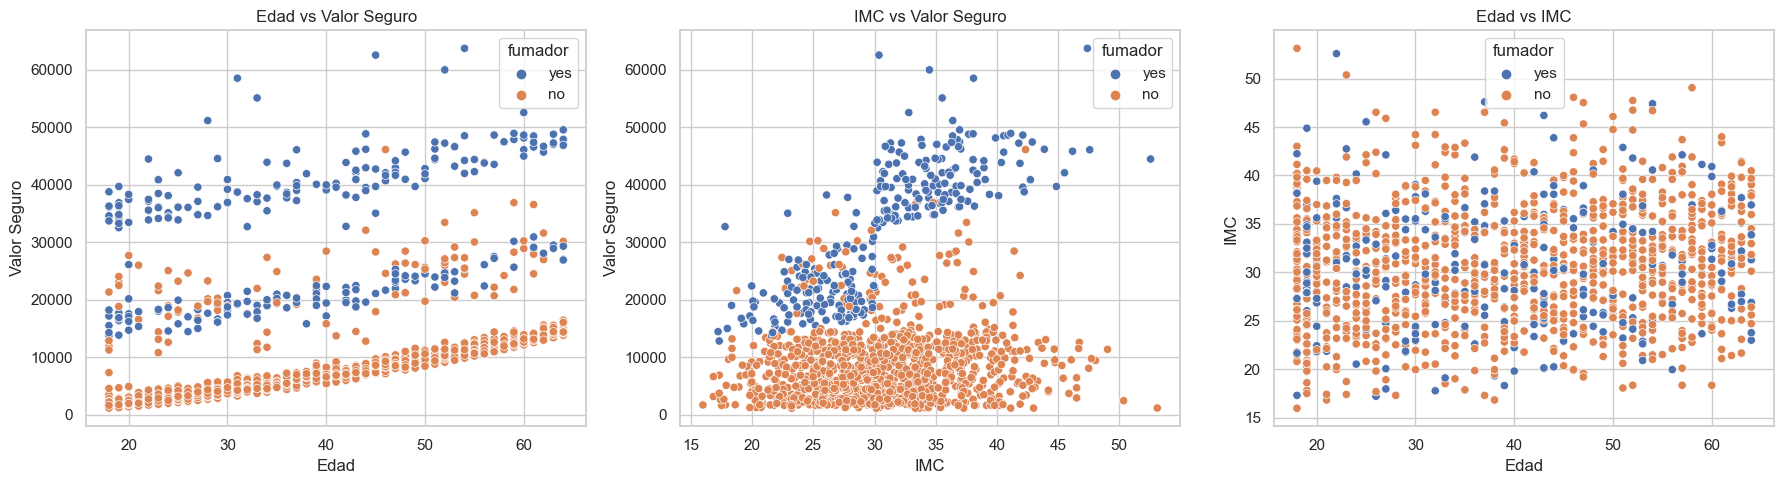

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y un conjunto de ejes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Graficar dispersión para cada variable numérica en función de 'fumador'
sns.scatterplot(x='edad', y='valor_seguro', hue='fumador', data=df, ax=axes[0])
axes[0].set_title('Edad vs Valor Seguro')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Valor Seguro')

sns.scatterplot(x='imc', y='valor_seguro', hue='fumador', data=df, ax=axes[1])
axes[1].set_title('IMC vs Valor Seguro')
axes[1].set_xlabel('IMC')
axes[1].set_ylabel('Valor Seguro')

sns.scatterplot(x='edad', y='imc', hue='fumador', data=df, ax=axes[2])
axes[2].set_title('Edad vs IMC')
axes[2].set_xlabel('Edad')
axes[2].set_ylabel('IMC')

# Ajustar el layout para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico

Interpretación, grafica 1: Tipo de correlación: Postiva. Una correlación positiva es una relación entre dos variables en la que, a medida que una variable aumenta, la otra también tiende a aumentar. A medida que aumenta la edad aumenta el valor del seguro. Si es fumador es mas costoso el seguro.

Interpretación, grafica 2: Tipo de correlación: Postiva.  A mayor Indice de Masa Corporal, mayor número de Valor Seguro. En este caso el valor es mas costoso para los fumadores.

Interpretación, grafica 3: muestra una correlación positiva entre el IMC (Índice de Masa Corporal) y la edad. Esto significa que a medida que aumenta la edad, también lo hace el IMC en promedio

<h1>Frecuencia de Edades de los Asegurados</h1>

Text(0, 0.5, 'Frecuencia')

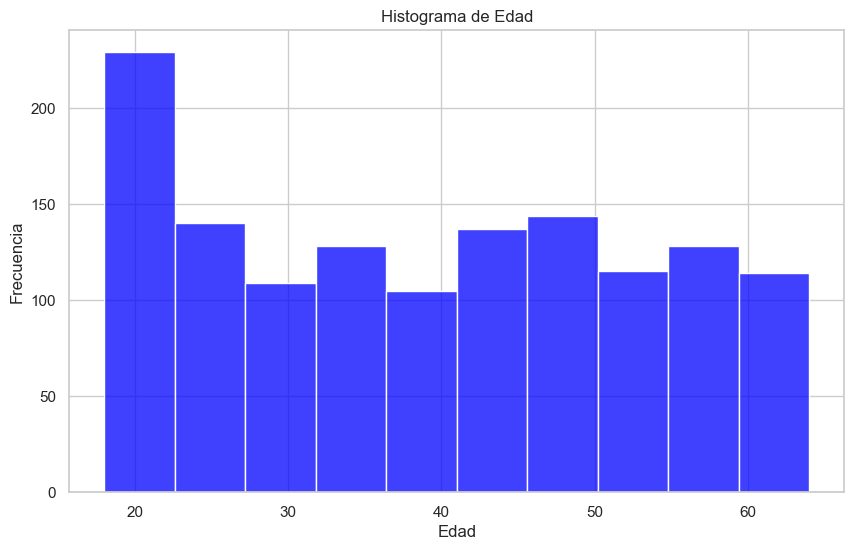

In [30]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el histograma para la columna 'edad'
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'].dropna(), bins=10, kde=False, color='blue')

# Configurar el título y las etiquetas
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


<h3>Conclusión ¿Respuesta a la pregunta?</h3>


¿Cuál es la edad poblacional en la que se debe concentrar la estrategia comercial teniendo en cuenta la mayor concentración afiliados? 

